### Zadanie 1
- Korzytając z pakietu <a href="https://github.com/JuliaMath/Polynomials.jl">Polynomials</a> zaimplentuj wielomiany Legendre'a zdefiniowane w taki sposób:

$P_{0}(x)=1$

$P_{1}(x)=x$

$P_{k+1}(x)=\frac{2k+1}{k+1} x P_{k}(x)-\frac{k}{k+1}P_{k-1}(x)$

- narysuj ich wykresy w przedziale (-1,1). 
- sprawdź(np. za pomocą fukcji <i>roots</i> z pakietu Polynomials), że ich zera  sa odciętymi punktów Gaussa. Test wykonaj dla wielomianow od 2 do 4 stopnia
- podaj związek tego faktu z podstawowym twierdzeniem kwadratur Gaussa (z wykładu)

In [1]:
using QuadGK
using Polynomials
using Plots
using Printf
using Images
using ImageMagick



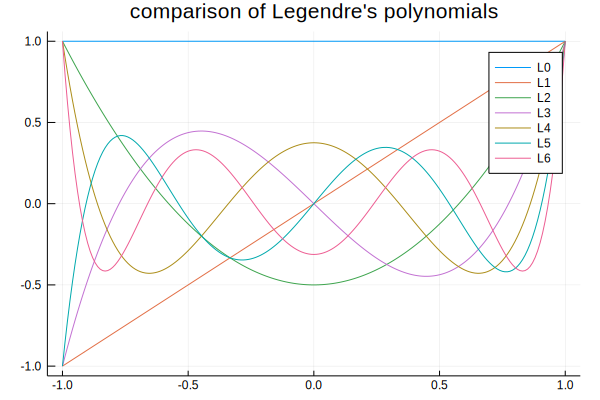

In [2]:
# trzeba przesunac indeksacje bo inaczej by sie zaczynalo od legendre(k+1)
# podstaw k <- k-1
function legendre(k)
    if k == 0 return Poly([1]) end
    if k == 1 return Poly([0,1]) end
    return (2(k-1)+1)/(k)*Poly([0,1])*legendre(k-1) - (k-1)/(k)*legendre(k-2)
end



x=-1:0.01:1
plt =plot(title="comparison of Legendre's polynomials")
for i in 0:6
    legendre_poly = legendre(i)
    L = [legendre_poly(x) for x in x]
    legendre_label = "L"*string(i)
    plot!(x,L,label=legendre_label)

end
display(plt)

    

In [3]:
for k in 2:4
    println("number of nodes ",k)
    (xp,a)=gauss(Float64,k)
    println(sort(xp), " gauss quadrature nodes")
    println(sort(roots(legendre(k)))," legendre roots")
    println("-----------")
end



number of nodes 2
[-0.57735, 0.57735] gauss quadrature nodes
[-0.57735, 0.57735] legendre roots
-----------
number of nodes 3
[-0.774597, 0.0, 0.774597] gauss quadrature nodes
[-0.774597, 0.0, 0.774597] legendre roots
-----------
number of nodes 4
[-0.861136, -0.339981, 0.339981, 0.861136] gauss quadrature nodes
[-0.861136, -0.339981, 0.339981, 0.861136] legendre roots
-----------


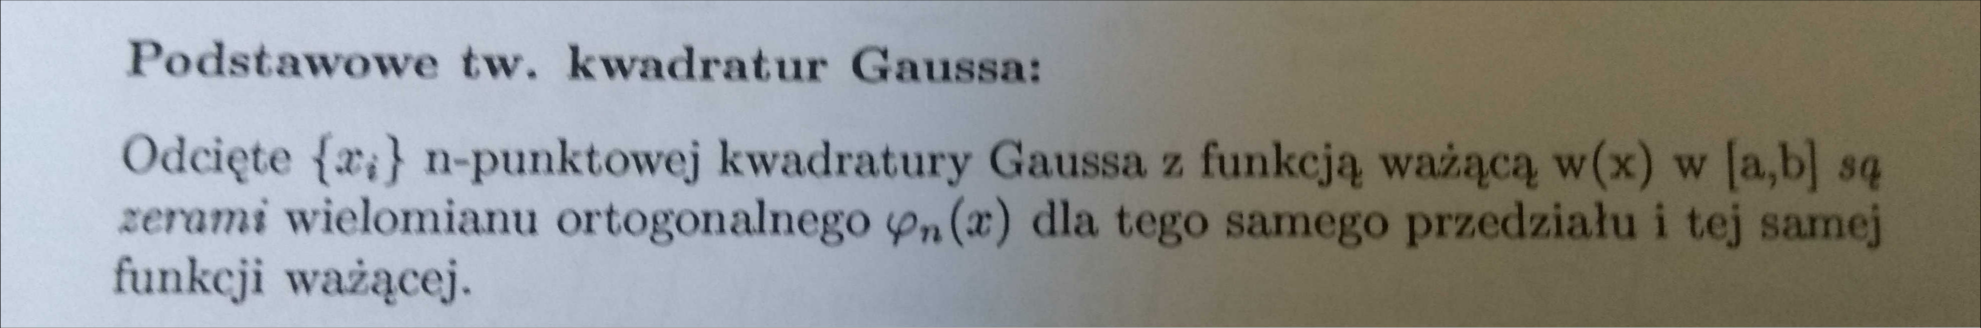

In [4]:
load("4.jpg")

### Zadanie 2
- Napisz funkcję, która dla podanej liczby punktów Gaussa $k$ oraz funkcji $f$  policzy $\int_{-1}^{1} f dx$
metodą używającą funkcji:
```julia
gauss(k)
```
oraz sumy 
```julia
sum(a .* f.(xp)) 
```
- przetestuj dla wielomianów coraz większych stopni
- sprawdz kiedy przestaje być dokładna, 
- podaj związek z twierdzeniem o  stopniu dokładności kwadratury Gaussa 

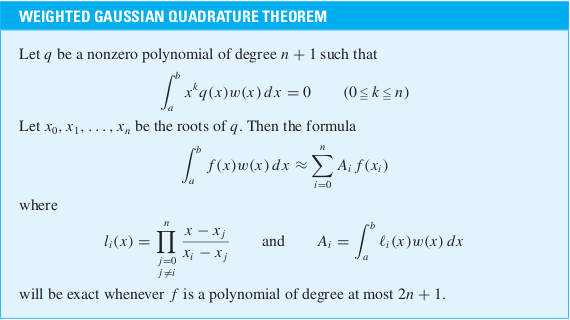

In [5]:
display(load("1.png"))


In [6]:
function integral(f,k)
    (xp,a)=gauss(Float64,k)
    sum(a .* f.(xp)) 
end


integral (generic function with 1 method)

Niech $ \int_{-1}^{1} f(x)dx$ 

żeby poprawnie ją przybliżyć musimy wziąć przynajmniej $2k-1 > deg(f) $ węzłów

Przykładowo dla $ \int_{-1}^{1} x^{40}+1 dx $ mamy $2k-1>40$ czyli wynik będzie dokładny dla $k \geq  20.5 $

In [7]:
f= x->x^40+1

for k in 1:40
    println(integral(f,k)," for k=",k)
end

println(2.0487804878048780487804878048780488, " exact result")




2.0 for k=1
2.000000000573594 for k=2
2.000040623982667 for k=3
2.0017591551911047 for k=4
2.0092091659459466 for k=5
2.020904323012524 for k=6
2.032056898040494 for k=7
2.0400838064551605 for k=8
2.0448323840934477 for k=9
2.047215204172309 for k=10
2.0482404499005193 for k=11
2.0486194197300858 for k=12
2.048739362532283 for k=13
2.0487716199694996 for k=14
2.0487789030486288 for k=15
2.0487802592565236 for k=16
2.0487804622355146 for k=17
2.048780485721937 for k=18
2.048780487694937 for k=19
2.048780487802056 for k=20
2.0487804878048785 for k=21
2.048780487804878 for k=22
2.048780487804878 for k=23
2.048780487804878 for k=24
2.0487804878048785 for k=25
2.0487804878048776 for k=26
2.0487804878048776 for k=27
2.0487804878048785 for k=28
2.048780487804878 for k=29
2.048780487804878 for k=30
2.0487804878048776 for k=31
2.0487804878048776 for k=32
2.048780487804878 for k=33
2.0487804878048776 for k=34
2.048780487804878 for k=35
2.0487804878048785 for k=36
2.048780487804879 for k=37
2.048

### Zadanie 3
 
Skorzystaj z rozwiązania zadania 2 do napisania funkcji 
liczącej  całki w dowolnym przedziale $\int_{a}^{b} f(x) dx$ 

dokonując normalizacji  do $\int_{-1}^{1} F(z) dz$ 

podstawiając:

$x=\frac{b+a}{2}+ \frac{b-a}{2} z $ oraz 

$dx =\frac{b-a}{2} dz $

Przetestuj działanie na kilku przykładach i sprawdź z wynikami otrzymanymi analitycznie.


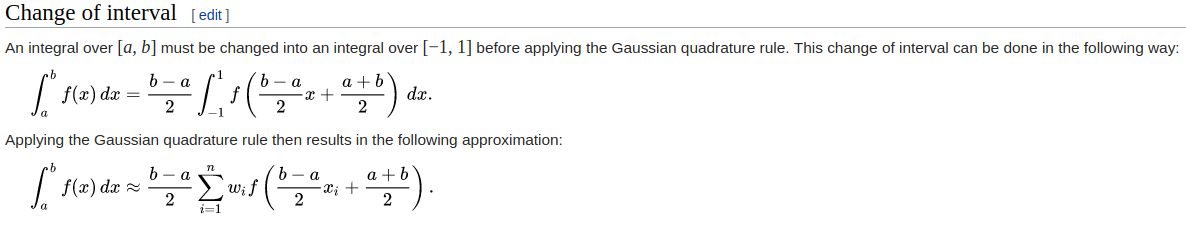

In [8]:
display(load("2.png"))


In [9]:
k=50
function integration(f,a,b)
    (xi,wi)=gauss(Float64,k)
    xi_ = [(b-a)/2*x+(a+b)/2 for x in xi]
    (b-a)/2*sum(wi .* f.(xi_)) 
end

println(integration(x-> x^2+x,4,8))
println(173.333333333333," EXACT RESULT")
println()

println(integration(x-> x^5+x^3-6x,-3,6))
println(7877.25," EXACT RESULT")
println()


println(integration(x-> x^6+7x,-10,6))
println(1468338.285714285714285714285714285714," EXACT RESULT")
println()





173.33333333333337
173.333333333333 EXACT RESULT

7877.250000000004
7877.25 EXACT RESULT

1.4683382857142864e6
1.4683382857142857e6 EXACT RESULT



### Zadanie 4
Głowną funkcją pakietu QuadGK jest adaptacyjna funkcja <a href="https://juliamath.github.io/QuadGK.jl/stable/#QuadGK.quadgk"> guadgk</a> używająca całkowania  Gauss-Kronroda

- użyj tej funkcji do policzenia  całki dla przykładowego wielomianu.
- funkcja ta ma możliwość liczenia również całek do nieskończoności
 Policz całkę od minus do plus nieskonczonosci 
 standardowego rozkładu normalnego Gaussa
$ \frac{1}{\sqrt{2\pi}}exp(\frac{-x^2}{2})$

In [12]:



println(quadgk(x-> 1/x,4,8)[1]," QuadGK result of 1/x on (",4,",",8,")" )
println( 0.69314718055994530941723212, " exact result ")
println()

println(quadgk(x-> 1/sqrt(2pi)*exp((-x^2)/2),-Inf,Inf)[1]," Gauss normal distribution")



0.6931471805599453 QuadGK result of 1/x on (4,8)
0.6931471805599453 exact result 

1.0000000000032583 Gauss normal distribution


### Zadanie 5
Napisz własną funkcję całkującą metodą prostokątów albo trapezów. Narysuj wykres funkcji błędu
w stosunku do wyniku otrzymanego analitycznie 
w zaleznosci od ilosci potrzebnych przedziałów  dla przykładowego wielomianu.

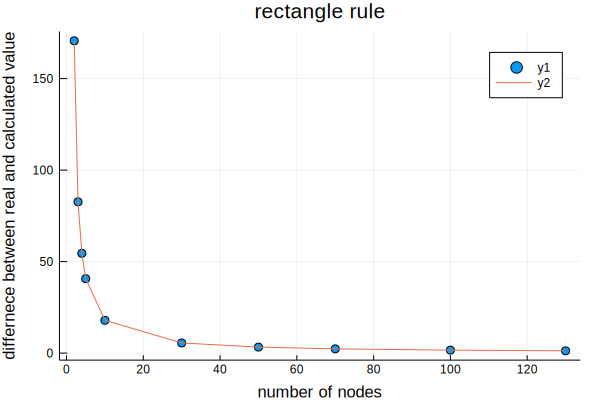

In [14]:
f = x->x^2
a = 4
b = 8
n =10

function rectangle_rule(f,a,b,n)
    if n<2 error("n mus be greater than 1") end

    x = a:(b-a)/(n-1):b
    fx = [f(x) for x in x]

    dx = x[2]-x[1]

    dx*(sum(fx))
end

rectangle = []
gauss_ = []

testx = [2,3,4,5,10,30,50,70,100,130]
for n in testx
    push!(rectangle,rectangle_rule(f,4,8,n))
    push!(gauss_,quadgk(f,a,b)[1])
end

testerror = abs.(gauss_ .- rectangle)

scatter(testx,testerror, xlabel = "number of nodes" , ylabel = "differnece between real and calculated value",title = "rectangle rule")
plot!(testx,testerror)